In [ ]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
from math import factorial

# Actividad 03: Errores

### Profesor: Juan Marcos Marín Ramírez
#### Métodos Computacionales
---

# 1
La serie de Taylor para la función seno ($\sin(x)$) centrada en $a=0$ (también conocida como la serie de Maclaurin) se expresa de la siguiente manera:

> Añadir blockquote



$$\sin(x) = \sum_{n=0}^{\infty} \frac{(-1)^n}{(2n+1)!} x^{2n+1} = x - \frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!} + \cdots$$

* Encontrar la aproximación para $x = \pi/4$ cambiando el valor de tolerancia, ¿Qué puede concluir de la serie?
* Hallar el error relativo y porcentual.
* Grafique los valores asociados a la serie después de cada iteración.
* Repita para la serie:
$$\ln(1+x) = \sum_{n=1}^{\infty} \frac{(-1)^{n-1}}{n} x^n$$

Aproximación de sin(pi/4): 0.7071067829368671
Valor real: 0.7071067811865475
Error porcentual: 2.475325811534497e-07
Número de iteraciones: 5
Error relativo: 2.4753258115344967e-09


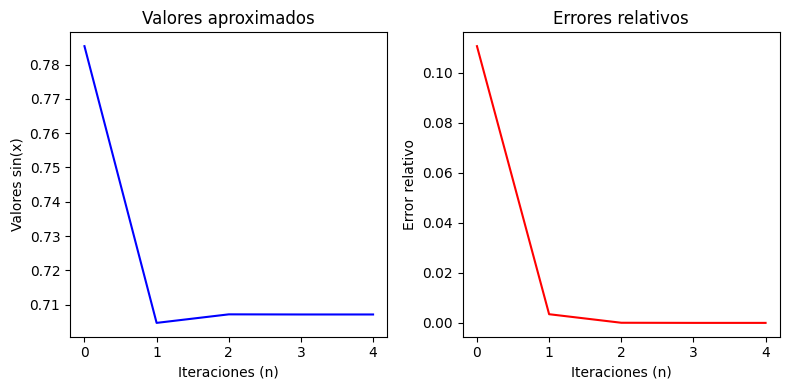

Aproximación de ln(1 + 0.5)): 0.405464803170835
Valor real: 0.4054651081081644
Error porcentual: 7.520679912757212e-05
Número de iteraciones: 16
Error relativo: 7.520679912757212e-07


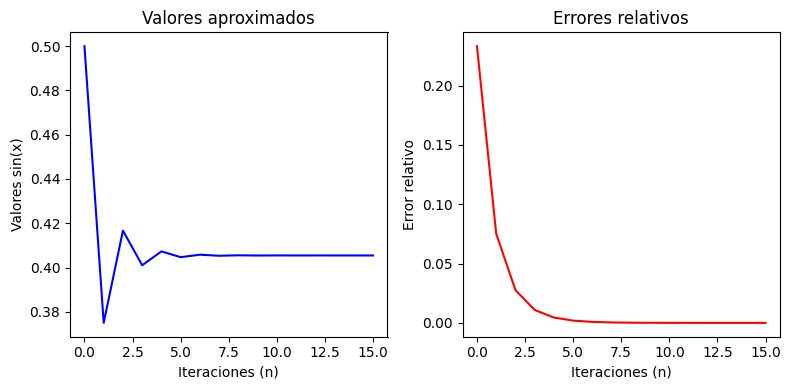

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
def sin_taylor(x, tol=1e-6, max_iter=100):
    '''
    Calcula la aproximación de la función seno utilizando la serie de Taylor
    Parámetros:
    - x: valor en radianes
    - tol: tolerancia para el error
    - max_iter: número máximo de iteraciones
    Retorna:
    - errores: lista de errores relativos en cada iteración
    - valores: lista de aproximaciones de la función seno
    - error porcentual: error porcentual final
    - resultado: aproximación final de sin(x)
    - n: número de iteraciones
    '''
    resultado = 0
    termino = x
    n = 0
    errores = []
    valores = []

    while abs(termino) > tol and n < max_iter:
      termino = (((-1)**n)/ math.factorial(2*n + 1)) * (x**(2*n + 1))
      resultado += termino # Añadir a las aproximaciones calculadas
      valor_real = math.sin(x) # Valor real
      error_relativo = abs(valor_real - resultado) / abs(valor_real)
      error_porcentual = error_relativo * 100
      errores.append(error_relativo) # Añadir a la lista de errores
      valores.append(resultado) # Añadir a la lista de valores
      n += 1 # Contar número de iteraciones

    return n, errores, valores, error_porcentual, resultado

def grafica(valores, errores):
  '''
  Graficar la aproximación y el error relativo de la función seno por medio de la serie de Taylor
  Parámetros:
  - valores: lista de aproximaciones de la función seno
  - errores: lista de errores relativos en cada iteración
  '''
  fig, axs = plt.subplots(1, 2, figsize=(8, 4))

  axs[0].plot(valores, color='blue')
  axs[0].set_title('Valores aproximados')
  axs[0].set_xlabel('Iteraciones (n)')
  axs[0].set_ylabel('Valores sin(x)')

  axs[1].plot(errores, color='red')
  axs[1].set_title('Errores relativos')
  axs[1].set_xlabel('Iteraciones (n)')
  axs[1].set_ylabel('Error relativo')

  plt.tight_layout()
  plt.show()


x = np.pi / 4
iteraciones, errores, valores, error_porcentual, resultado = sin_taylor(x)
print(f'Aproximación de sin(pi/4): {resultado}')
print(f'Valor real: {np.sin(x)}')
print(f'Error porcentual: {error_porcentual}')
print(f'Número de iteraciones: {iteraciones}')
print(f'Error relativo: {errores[-1]}')

grafica(valores, errores)

def ln_taylor(x, tol=1e-6, max_iter=100):
  '''
  Calcula la aproximación de la función ln(1+x) utilizando la serie de Taylor
  Parámetros:
  - x: valor en a calcular en ln(1+x)
  - tol: tolerancia para detener la serie si el término es pequeño
  - max_iter: número máximo de iteraciones
  Retorna:
  - errores: lista de errores relativos en cada iteración
  - valores: lista de aproximaciones de la función ln(1+x)
  - error_porcentual: error porcentual final
  - resultado: aproximación final de ln(1+x)
  - n: número de iteraciones
  '''
  if x <= -1:
    raise ValueError("El valor de x debe ser mayor o igual a -1")

  resultado = 0
  errores = []
  valores = []
  n = 1
  while n <= max_iter:
    termino = ((-1)**(n-1) / n) * (x**n)
    resultado += termino
    valor_real = math.log(1 + x)
    error_relativo = abs(valor_real - resultado) / abs(valor_real)
    error_porcentual = error_relativo * 100
    errores.append(error_relativo)
    valores.append(resultado)
    if abs(termino) < tol:
      break
    n += 1

  return n, errores, valores, error_porcentual, resultado

x_ingresado = 0.5
iteraciones_ln, errores_ln, valores_ln, error_porcentual_ln, resultado_ln = ln_taylor(x_ingresado)
print(f'Aproximación de ln(1 + {x_ingresado})): {resultado_ln}')
print(f'Valor real: {np.log(1 + x_ingresado)}')
print(f'Error porcentual: {error_porcentual_ln}')
print(f'Número de iteraciones: {iteraciones_ln}')
print(f'Error relativo: {errores_ln[-1]}')

grafica(valores_ln, errores_ln)


# 2

La serie de Taylor para la función $(1+x)^\alpha$, conocida como la **serie binomial**, centrada en $a=0$ está dada por:

$$(1+x)^\alpha = \sum_{n=0}^{\infty} \binom{\alpha}{n} x^n = 1 + \alpha x + \frac{\alpha(\alpha-1)}{2!} x^2 + \frac{\alpha(\alpha-1)(\alpha-2)}{3!} x^3 + \cdots$$

donde $\binom{\alpha}{n}$ es el coeficiente binomial generalizado.

Considere el caso donde $\alpha = 1/2$, lo que nos da la serie de Taylor para $\sqrt{1+x}$:

$$\sqrt{1+x} = \sum_{n=0}^{\infty} \binom{1/2}{n} x^n = 1 + \frac{1}{2} x - \frac{1}{8} x^2 + \frac{1}{16} x^3 - \frac{5}{128} x^4 + \cdots$$

a.  **Encontrar la aproximación para $x = 0.5$** cambiando el número de términos incluidos en la suma. ¿Qué puedes concluir sobre la convergencia de la serie para este valor de $x$?

b.  **Hallar el error relativo y porcentual** para cada aproximación, utilizando el valor real de $\sqrt{1+0.5} = \sqrt{1.5} \approx 1.224744871$.


c.  **Grafique los valores asociados a la serie después de cada iteración.** Muestra cómo la serie se acerca al valor real a medida que se incluyen más términos.

d. **Utilizando el criterio de tolerancia, evalue 6 a 7 valores diferentes**, y encuentre cuántos términos son necesarios para alcanzar dicha resolución. Realice un gráfico de la evolución del sistema.



Aproximaciones y convergencia:
Términos  Aproximación   Error Relativo Error %   
1         1.00000000     0.18350342     18.3503   
2         1.25000000     0.02062073     2.0621    
3         1.21875000     0.00489479     0.4895    
4         1.22656250     0.00148409     0.1484    
5         1.22412109     0.00050931     0.0509    
6         1.22497559     0.00018838     0.0188    
7         1.22465515     0.00007326     0.0073    
8         1.22478104     0.00002953     0.0030    
9         1.22472990     0.00001223     0.0012    
10        1.22475120     0.00000517     0.0005    


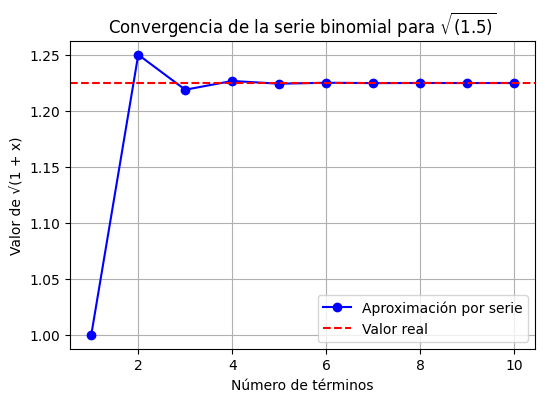

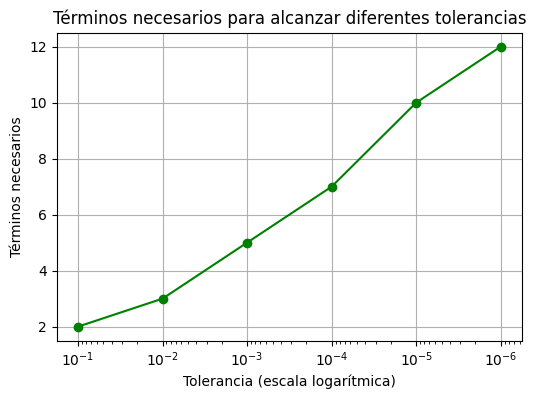


Términos necesarios para diferentes tolerancias:
Tolerancia: 1e-01 ; Términos necesarios: 2
Tolerancia: 1e-02 ; Términos necesarios: 3
Tolerancia: 1e-03 ; Términos necesarios: 5
Tolerancia: 1e-04 ; Términos necesarios: 7
Tolerancia: 1e-05 ; Términos necesarios: 10
Tolerancia: 1e-06 ; Términos necesarios: 12


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial

# Valor real de (1.5)**(1/2)
valor_real = np.sqrt(1.5)

# Función para calcular el coeficiente binomial generalizado
def coef_binomial(alpha, n):
    if n == 0:
        return 1
    coef = 1
    for k in range(1, n+1):
        coef *= (alpha - (k - 1)) / k
    return coef

# a. Aproximación de la serie para x=0.5 con diferentes términos
def aproximacion_serie(x, alpha, n_terminos):
    suma = 0
    for n in range(n_terminos):
        suma += coef_binomial(alpha, n) * (x**n)
    return suma

# b. Cálculo de errores relativo y porcentual
def calcular_errores(aproximacion, valor_real):
    error_relativo = abs(aproximacion - valor_real) / valor_real
    error_porcentual = error_relativo * 100
    return error_relativo, error_porcentual

# Parámetros del problema
x = 0.5
alpha = 0.5
max_terminos = 10  # Número máximo de términos a considerar

# Resultados para los incisos a y b
print("Aproximaciones y convergencia:")
print(f"{'Términos':<10}{'Aproximación':<15}{'Error Relativo':<15}{'Error %':<10}")
for n in range(1, max_terminos + 1):
    aprox = aproximacion_serie(x, alpha, n)
    error_relativo, error_porcentual = calcular_errores(aprox, valor_real)
    print(f"{n:<10}{aprox:<15.8f}{error_relativo:<15.8f}{error_porcentual:<10.4f}")

# c. Gráfico de convergencia
terminos = list(range(1, max_terminos + 1))
aproximaciones = [aproximacion_serie(x, alpha, n) for n in terminos]

plt.figure(figsize=(6, 4))
plt.plot(terminos, aproximaciones, 'bo-', label='Aproximación por serie')
plt.axhline(y=valor_real, color='r', linestyle='--', label='Valor real')
plt.xlabel('Número de términos')
plt.ylabel('Valor de √(1 + x)')
plt.title('Convergencia de la serie binomial para $\sqrt{(1.5)}$')
plt.legend()
plt.grid(True)
plt.show()

# d. Evaluación con criterio de tolerancia
tolerancias = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
terminos_necesarios = []

for tol in tolerancias:
    n = 1
    while True:
        aprox = aproximacion_serie(x, alpha, n)
        error_relativo = abs(aprox - valor_real) / valor_real
        if error_relativo <= tol or n > 100:  # Límite superior para evitar bucles infinitos
            break
        n += 1
    terminos_necesarios.append(n)

plt.figure(figsize=(6, 4))
plt.semilogx(tolerancias, terminos_necesarios, 'go-')
plt.gca().invert_xaxis()  # Para mostrar las tolerancias más estrictas a la izquierda
plt.xlabel('Tolerancia (escala logarítmica)')
plt.ylabel('Términos necesarios')
plt.title('Términos necesarios para alcanzar diferentes tolerancias')
plt.grid(True)
plt.show()

print("\nTérminos necesarios para diferentes tolerancias:")
for tol, n in zip(tolerancias, terminos_necesarios):
    print(f"Tolerancia: {tol:.0e} ; Términos necesarios: {n}")